# CA3: Capstone Project **AI Bible App**

Table of contents:

- Data Overview
- Data Understanding
    - Descriptive Analysis
- Data Preparation
- EDA
- ANOVA and Chi-Square Tests
- Machine Learning
    1. Introduction
    2. Web Scrapping Training Data
    3. Model Development 1
    4. Model Development 2
    5. Best Performer Model Vs Tuned
        - Model Evaluation and Conclusion
- App MVP
    - Test Data
- Results
    - Challenges encountered
    - Results and analysis… next steps
    - Conclusion
- References


## Data Overview

In [2]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import nltk
import random
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from scipy.stats import shapiro, f_oneway, chi2_contingency
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from gensim.models import Word2Vec
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import re
from nltk.stem import WordNetLemmatizer

# Loading dataset
file_path = 'bible.csv'
bible_data = pd.read_csv(file_path)

# First look
bible_data.head()


,id,book_id,book_name,chapter,verse,world_english_bible_web,king_james_bible_kjv,leningrad_codex,jewish_publication_society_jps,codex_alexandrinus,brenton,samaritan_pentateuch,samaritan_pentateuch_english,onkelos_aramaic,onkelos_english
0,1,1,Genesis,1,1,"In the beginning God{After ""God,"" the Hebrew h...",In the beginning God created the heaven and th...,בְּרֵאשִׁית בָּרָא אֱלֹהִים אֵת הַשָּׁמַיִם וְ...,In the beginning God created the heaven and th...,ἐν ἀρχῇ ἐποίησεν ὁ θεὸς τὸν οὐρανὸν καὶ τὴν γῆν,In the beginning God made the heaven and the e...,בראשית ברא אלהים את השמים ואת הארץ,In the beginning God created the heaven and th...,בְּקַדְמִין בְּרָא יְיָ יָת שְׁמַיָּא וְיָת אַ...,In the first times the Lord created the heaven...
1,2,1,Genesis,1,2,Now the earth was formless and empty. Darknes...,"And the earth was without form, and void; and ...",וְהָאָרֶץ הָיְתָה תֹהוּ וָבֹהוּ וְחֹשֶׁךְ עַל־...,"Now the earth was unformed and void, and darkn...",ἡ δὲ γῆ ἦν ἀόρατος καὶ ἀκατασκεύαστος καὶ σκότ...,"But the earth was unsightly and unfurnished, a...",והארץ היתה תהו ובהו וחשך על פני תהום ורוח אלהי...,"And the earth was without form, and void; and ...",וְאַרְעָא הֲוַת צָדְיָא וְרֵיקַנְיָא וַחֲשׁוֹכ...,"And the earth was waste and empty, and darknes..."
2,3,1,Genesis,1,3,"God said, ""Let there be light,"" and there was ...","And God said, Let there be light: and there wa...",וַיֹּאמֶר אֱלֹהִים יְהִי אוֹר וַיְהִי־אוֹר׃ ‬,"And God said: ""Let there be light."" And there ...",καὶ εἶπεν ὁ θεός γενηθήτω φῶς καὶ ἐγένετο φῶς,"And God said, Let there be light, and there wa...",ויאמר אלהים יהי אור ויהי אור,"And God said, Let there be light: and there wa...",וַאֲמַר יְיָ יְהֵי נְהוֹרָא וַהֲוָה נְהוֹרָא,"And the Lord said, Let there be light; and the..."
3,4,1,Genesis,1,4,"God saw the light, and saw that it was good. ...","And God saw the light, that it was good: and G...",וַיַּרְא אֱלֹהִים אֶת־הָאוֹר כִּי־טוֹב וַיַּבְ...,"And God saw the light, that it was good; and G...",καὶ εἶδεν ὁ θεὸς τὸ φῶς ὅτι καλόν καὶ διεχώρισ...,"And God saw the light that it was good, and Go...",וירא אלהים את האור כי טוב ויבדל אלהים בין האור...,"And God saw the light, that [it was] good: and...",וַחֲזָא יְיָ יָת נְהוֹרָא אֲרֵי טָב וְאַפְרֵשׁ...,And the Lord saw the light that it was good. A...
4,5,1,Genesis,1,5,"God called the light Day, and the darkness he ...","And God called the light Day, and the darkness...",וַיִּקְרָא אֱלֹהִים לָאוֹר יוֹם וְלַחֹשֶׁךְ קָ...,"And God called the light Day, and the darkness...",καὶ ἐκάλεσεν ὁ θεὸς τὸ φῶς ἡμέραν καὶ τὸ σκότο...,"And God called the light Day, and the darkness...",ויקרא אלהים לאור יום ולחשך קרא לילה ויהי ערב ו...,"And God called the light Day, and the darkness...",וּקְרָא יְיָ לִנְהוֹרָא יְמָמָא וְלַחֲשׁוֹכָא ...,"And the Lord called the light the Day, and the..."


## Data Understanding

Characterisation of the data set: size; number of attributes; has/does not have missing values,
number of observations etc.

In [3]:
print("\nDataset Info:")
bible_data.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31102 entries, 0 to 31101
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   id                              31102 non-null  int64 
 1   book_id                         31102 non-null  int64 
 2   book_name                       31102 non-null  object
 3   chapter                         31102 non-null  int64 
 4   verse                           31102 non-null  int64 
 5   world_english_bible_web         31102 non-null  object
 6   king_james_bible_kjv            31102 non-null  object
 7   leningrad_codex                 23145 non-null  object
 8   jewish_publication_society_jps  23145 non-null  object
 9   codex_alexandrinus              23145 non-null  object
 10  brenton                         23145 non-null  object
 11  samaritan_pentateuch            5852 non-null   object
 12  samaritan_pentateuch_english   

In [4]:
print(bible_data.shape)

(31102, 15)


In [5]:
print(bible_data.columns)

Index(['id', 'book_id', 'book_name', 'chapter', 'verse',
       'world_english_bible_web', 'king_james_bible_kjv', 'leningrad_codex',
       'jewish_publication_society_jps', 'codex_alexandrinus', 'brenton',
       'samaritan_pentateuch', 'samaritan_pentateuch_english',
       'onkelos_aramaic', 'onkelos_english'],
      dtype='object')


In [6]:
print(bible_data.isnull().sum())

id                                    0
book_id                               0
book_name                             0
chapter                               0
verse                                 0
world_english_bible_web               0
king_james_bible_kjv                  0
leningrad_codex                    7957
jewish_publication_society_jps     7957
codex_alexandrinus                 7957
brenton                            7957
samaritan_pentateuch              25250
samaritan_pentateuch_english      25250
onkelos_aramaic                   25250
onkelos_english                   25250
dtype: int64


In [7]:
print(len(bible_data))

31102


### Descriptive Analysis:
To summarize the main characteristics of the dataset, it contains probabilities, central tendency metrics and variation
metrics, and a normality test.


In [8]:
bible_data.describe() 

,id,book_id,chapter,verse
count,31102.000000,31102.000000,31102.000000,31102.000000
mean,15551.500000,22.496142,20.631246,17.043373
std,8978.518373,16.495843,23.408441,14.075305
min,1.000000,1.000000,1.000000,1.000000
25%,7776.250000,9.000000,6.000000,7.000000
50%,15551.500000,19.000000,14.000000,14.000000
75%,23326.750000,40.000000,26.000000,23.000000
max,31102.000000,66.000000,150.000000,176.000000


#### Lets pick up a numerical column to draw some insights:

- Verses, this app pretends to predict verses so lets see some Descriptive Analysis

In [9]:
print("Range:", bible_data['verse'].max() - bible_data['verse'].min())
print("Variance:", bible_data['verse'].var())
print("Standard Deviation:", bible_data['verse'].std())


Range: 175
Variance: 198.11422427771265
Standard Deviation: 14.075305477243209


In [10]:
stat, p_value = shapiro(bible_data['verse'])
if p_value > 0.05:
    print("Data follows a normal distribution.")
else:
    print("Data does not follow a normal distribution.")


Data does not follow a normal distribution.


c:\Users\gabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


 For probabilities (e.g., the proportion of rows with missing values in specific columns or counts of distinct values):

In [11]:
print(bible_data['book_name'].value_counts(normalize=True))

book_name
Psalms      0.079127
Genesis     0.049289
Jeremiah    0.043856
Isaiah      0.041541
Numbers     0.041412
              ...   
Philemon    0.000804
Jude        0.000804
Obadiah     0.000675
3 John      0.000450
2 John      0.000418
Name: proportion, Length: 66, dtype: float64


## Data Preparation 

Feature Engineering:

We will use "king_james_bible_kjv" column for this app, because this is this is how the typical bible verses shows in the regular bible

In [12]:
translation_column = 'king_james_bible_kjv'

bible_data = bible_data.dropna(subset=[translation_column])

verses = bible_data[translation_column]

## EDA
Plots and what they mean

**Number of verses per book:**  Lets see the books with the most bible verses, maybe we can feauture engineer them in the future with some cool in-app settings

C:\Users\gabri\AppData\Local\Temp\ipykernel_11296\4197130594.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=verse_counts.index, y=verse_counts.values, palette='viridis')


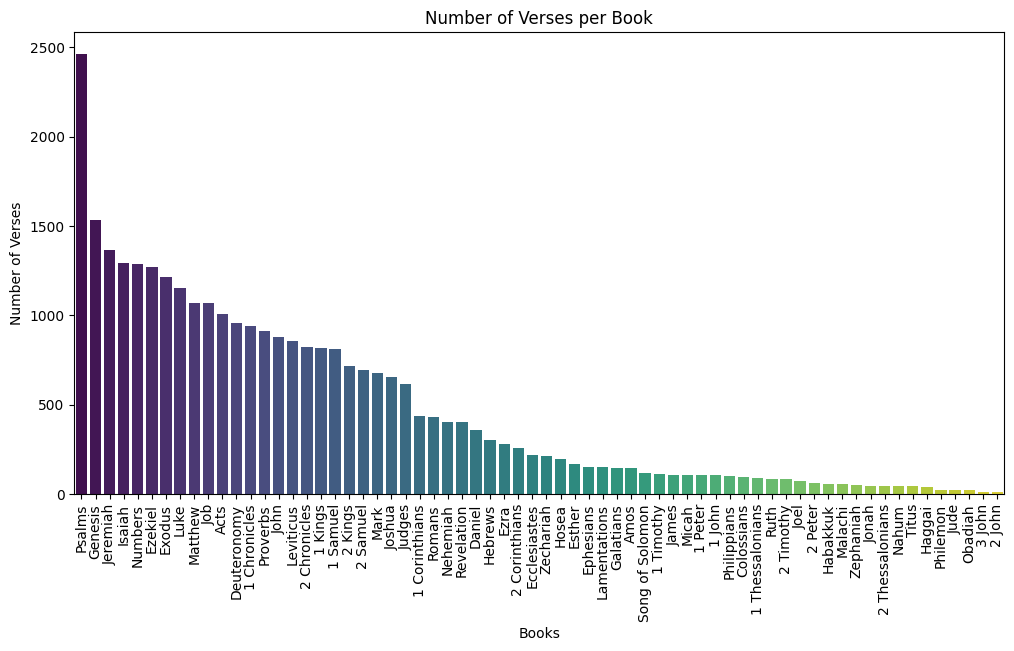

In [13]:
# EDA: Number of verses per book
verse_counts = bible_data['book_name'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=verse_counts.index, y=verse_counts.values, palette='viridis')
plt.xticks(rotation=90)
plt.title('Number of Verses per Book')
plt.xlabel('Books')
plt.ylabel('Number of Verses')
plt.show()


**Average verse length by book** Same as here, we see that the books of Proverbs has the shortest verses but written from the wisest man of the world at that time... maybe that says a lot

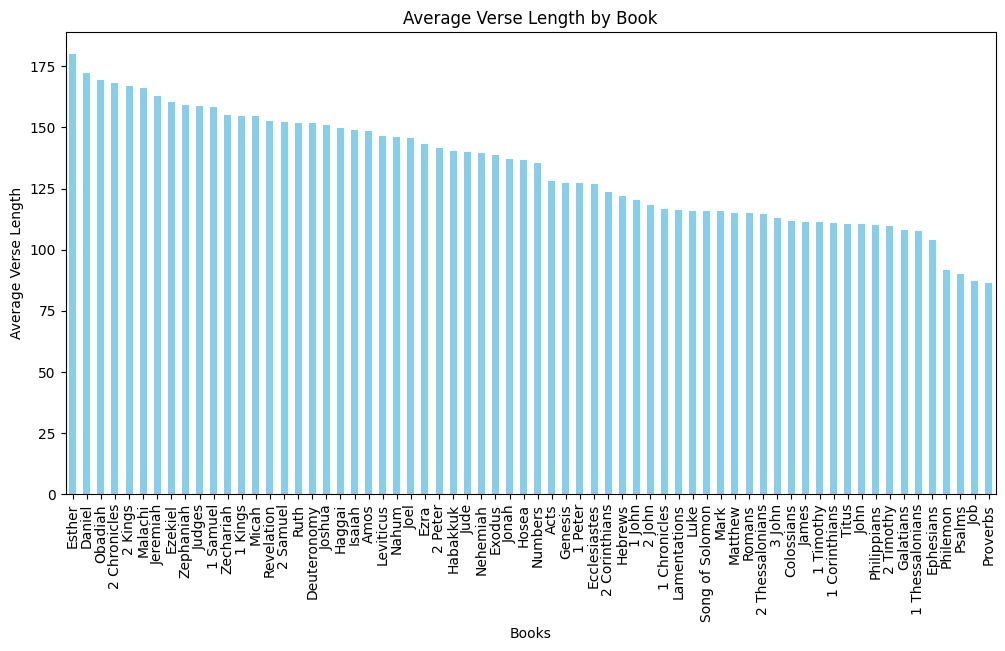

In [14]:
# EDA: Average verse length by book
bible_data['verse_length'] = bible_data[translation_column].apply(lambda x: len(str(x)))
avg_verse_length = bible_data.groupby('book_name')['verse_length'].mean()
plt.figure(figsize=(12, 6))
avg_verse_length.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Average Verse Length by Book')
plt.xlabel('Books')
plt.ylabel('Average Verse Length')
plt.show()


**Most common words** we are going to see the most common words of the bible, but first lets take advantage of the code to find the most common **stop-words** so then we can see the real words, hope that makes sense.

In [15]:
# Get rid of whitespace
preprocessed_verses = verses.str.strip()

# Tokenizing words then using the Counter
all_words = ' '.join(preprocessed_verses).split()
stop_word_counts = Counter(all_words)

# Displaying the 10 most common stop-words
print(stop_word_counts.most_common(30))

[('the', 62058), ('and', 38575), ('of', 34392), ('to', 13365), ('And', 12735), ('that', 12452), ('in', 12167), ('shall', 9760), ('he', 9509), ('unto', 8930), ('I', 8708), ('his', 8362), ('a', 7942), ('for', 7141), ('they', 6893), ('be', 6718), ('is', 6695), ('with', 5951), ('not', 5840), ('all', 5238), ('thou', 4629), ('it', 4461), ('thy', 4450), ('was', 4447), ('which', 4268), ('my', 4135), ('LORD', 3929), ('their', 3873), ('have', 3821), ('will', 3751)]


Now lets find the real words passing these words above as stops-words

In [16]:
# NLTK
nltk.download('punkt')
nltk.download('stopwords')

# Text processing function
def process_text(text):
    # Tokenizing text
    tokens = word_tokenize(str(text).lower())
    
    # Removing Stop words
    custom_stop_words = set(stopwords.words('english')).union(
        {'the', 'and', 'of', 'to', 'you', 'in', 'he', 'for', 'that', 'his', 'so', 'unto', 'they'}
    )
    tokens = [word for word in tokens if word.isalpha() and word not in custom_stop_words]
    
    # Stemming words
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    
    return ' '.join(stemmed_tokens)

# Processing verses
bible_data['processed_text'] = bible_data[translation_column].apply(process_text)

# Word Frequency Analysis
all_words = ' '.join(bible_data['processed_text']).split()
word_counts = Counter(all_words)
word_counts_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)

[nltk_data] Downloading package punkt to C:\Users\gabri/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gabri/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Lets plot them:

C:\Users\gabri\AppData\Local\Temp\ipykernel_11296\213674946.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=word_counts_df.head(20)['Word'], y=word_counts_df.head(20)['Frequency'], palette='mako')


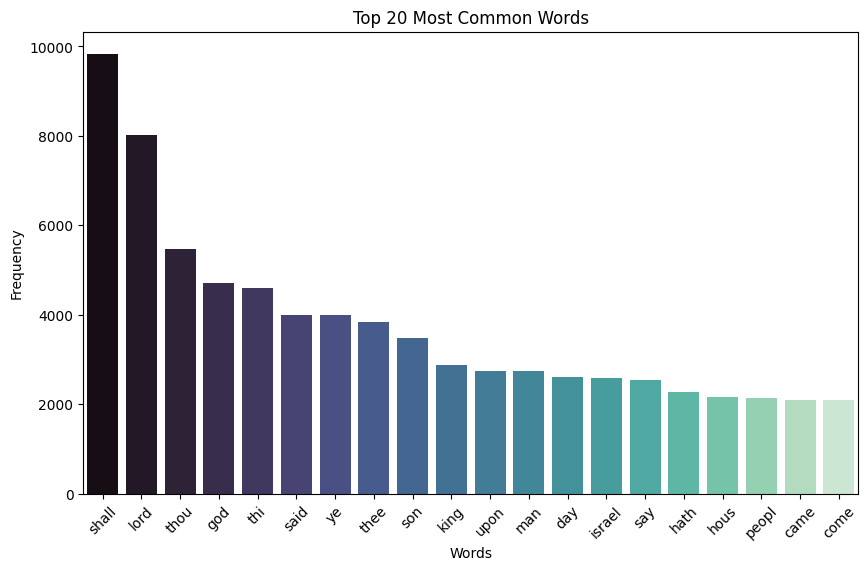

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(x=word_counts_df.head(20)['Word'], y=word_counts_df.head(20)['Frequency'], palette='mako')
plt.xticks(rotation=45)
plt.title('Top 20 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

This will helps us in different ways, for example, in the building of topics, the word Lord, we can create a topic called "God's will for you", etc...

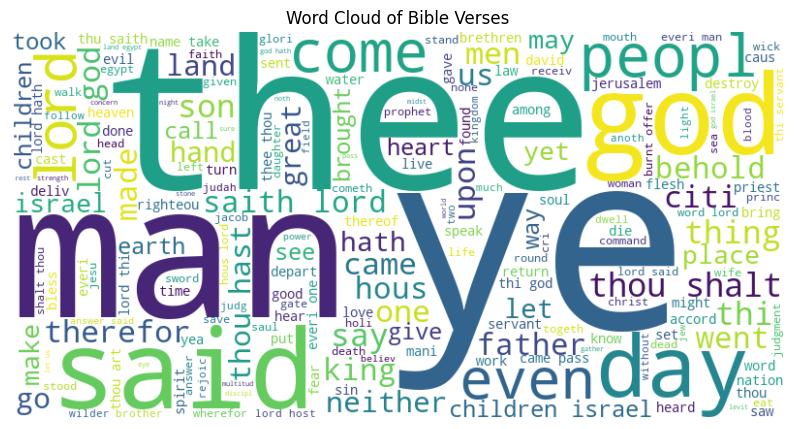

In [18]:
# Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Bible Verses')
plt.show()


**Sentiment Analysis suing TextBlob:** TextBlob feature allows us to determine whether the input textual data has a positive, negative, or neutral tone

C:\Users\gabri\AppData\Local\Temp\ipykernel_11296\3755320861.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiments.index, y=sentiments.values, palette='coolwarm')


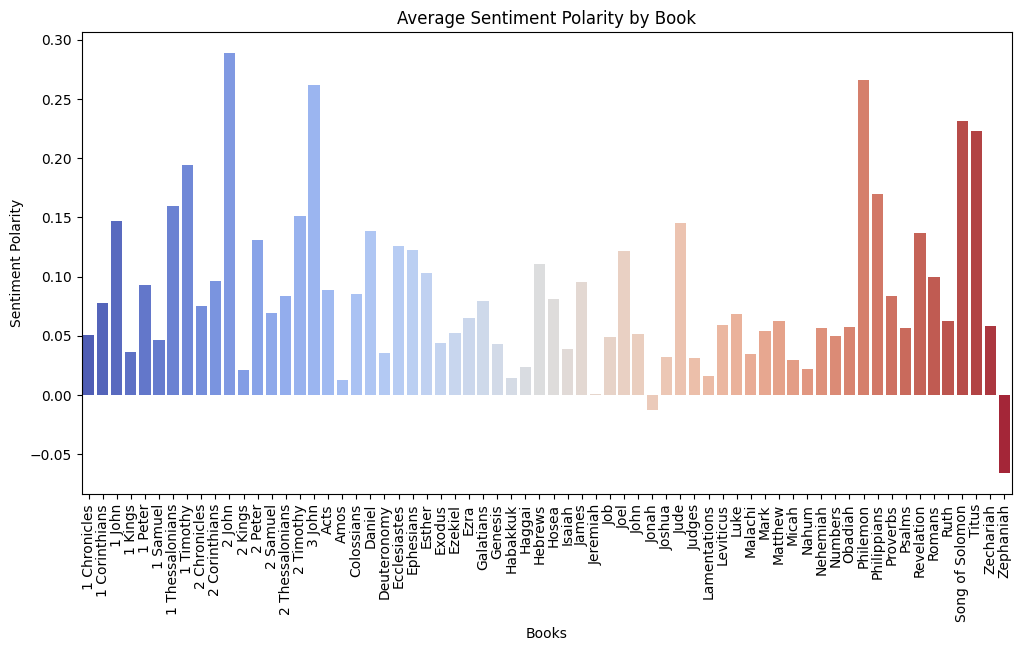

In [19]:
# Sentiment Analysis
bible_data['sentiment_polarity'] = bible_data[translation_column].apply(lambda x: TextBlob(x).sentiment.polarity)
sentiments = bible_data.groupby('book_name')['sentiment_polarity'].mean()

# Ploting it
plt.figure(figsize=(12, 6))
sns.barplot(x=sentiments.index, y=sentiments.values, palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Average Sentiment Polarity by Book')
plt.xlabel('Books')
plt.ylabel('Sentiment Polarity')
plt.show()


Very, very interesting sentimenst results, we can work on them in the future in our app, like books to avoid or the contrary, books to recommend.

In [20]:
# Feature Engineering: bible verese length for ANOVA and Chi Square Tests
bible_data['verse_length_kjv'] = bible_data[translation_column].apply(lambda x: len(x))

## ANOVA and Chi-Square

Lets see if there is a significant difference between Bible veres lenght across the different books of the Bible, we will use both ANOVA and Chi-square

### ANOVA

In [21]:
# Groupping bible verses
grouped_data_kjv = bible_data.groupby('book_name')['verse_length_kjv'].apply(list)

# ANOVA
anova_result_kjv = f_oneway(*grouped_data_kjv)

# Checking
alpha = 0.05

if anova_result_kjv.pvalue < alpha:
    result_message_kjv = f"The p-value ({anova_result_kjv.pvalue:.4f}) is less than the alpha level ({alpha}), there is a significant difference in verse lengths across books."
else:
    result_message_kjv = f"The p-value ({anova_result_kjv.pvalue:.4f}) is greater than the alpha level ({alpha}), there is not significant difference in verse lengths across books."

result_message_kjv

'The p-value (0.0000) is less than the alpha level (0.05), there is a significant difference in verse lengths across books.'

### Chi-Square

In [22]:
# Categorizing into bins
bins = [0, 50, 100, 150, 200, np.inf]
labels = ['Very Short', 'Short', 'Medium', 'Long', 'Very Long']
bible_data['length_category'] = pd.cut(bible_data['verse_length_kjv'], bins=bins, labels=labels)

# Contingency table
contingency_table = pd.crosstab(bible_data['book_name'], bible_data['length_category'])

# Chi-Square
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Results
print("Chi-Square Test Results:")
print(f"Chi2 Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies Table:")
print(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns))

# Interpretation
alpha = 0.05
if p < alpha:
    print(f"\nThe p-value ({p:.4f}) is less than the alpha level ({alpha}), there is a significant relationship between book name and verse length.")
else:
    print(f"\nThe p-value ({p:.4f}) is greater than the alpha level ({alpha}), there is not a significant relationship between book name and verse length.")


Chi-Square Test Results:
Chi2 Statistic: 8841.629155432176
P-Value: 0.0
Degrees of Freedom: 260

Expected Frequencies Table:
length_category  Very Short       Short      Medium        Long   Very Long
book_name                                                                  
1 Chronicles      27.046685  301.208604  302.844126  191.719504  119.181082
1 Corinthians     12.547135  139.732654  140.491383   88.939940   55.288888
1 John             3.014758   33.574207   33.756511   21.370008   13.284515
1 Kings           23.428976  260.919555  262.336313  166.075494  103.239663
1 Peter            3.014758   33.574207   33.756511   21.370008   13.284515
...                     ...         ...         ...         ...         ...
Ruth               2.440518   27.179120   27.326699   17.299531   10.754132
Song of Solomon    3.359302   37.411260   37.614398   23.812295   14.802746
Titus              1.320751   14.708700   14.788567    9.362099    5.819883
Zechariah          6.058228   67.468169

Both ANOVA test and Chi-square confirms that there is a significant difference in Bible verses lenght across books

## Machine Learning

Table of content

1. Introduction
2. Web Scrapping Training Data
3. Model Development 1
4. Model Development 2
5. Best Performer Model Vs Tuned 


## 1. Introduction:

This app is huge in ML, we need to find a great algorithm in order to give the best experience to our users.

What we are doing now:

- I will train multiple Python algorithms with a new custom sample dataset that I will call *df_train*.
- Once I have this *df_train*, I will find the best algorithm with the best prediction score.
- Once I have this algorithm, I will tuned it to find if it can even perform better.
- Then I will test it with my original *bible_data* dataset while showing the MVP of this future app.

That is what we are doing now, in the future, we could make some sentiment analysis on the given prediction so we can retrain the algorithm based on the user's feedback.

## 2. Web scraping training data

As part of this third CA, I wanted to improve the quality of my training data, and one of the best ways to do it is by increasing its size. Thanks to a Python web scraping strategy, I went from less than 20 rows to 758 rows.

Steps:

- Found a respected website with bible verses grouped by topics.
- If topics need to be changed, I will do it according to the website topics.
- Webscrapp the verses and topic thanks to BeautifulSoup.
- Save them into a df.
- Train both the old Logistic Regression model from CA2 and the new models added in this CA
- Compare models to find the best performance.

**Function explanation:**

- Create the function and pass a topic
- These topics will be entered automatically once I first define the function
- There are 5 pages in each topic, so I'm taking all the verses in the 5 pages
- save the scraped verses into an empty list
- Iterate through the main page to find the topic passed
- Once the topic is found, get the "verses_king_james_bible_kjv" verses in the HTML
- Append the verse and the book reference of the bible text at the end
- Save all to a df

In [23]:
import requests
from bs4 import BeautifulSoup

# Web scrapping function
def scrape_bible_verses(topic):
    base_url = f"https://dailyverses.net/{topic}/kjv"
    max_pages = 5
    verses_list = []
    
    # Getting the url right
    for page in range(1, max_pages + 1):
        url = f"{base_url}?p={page}"
        response = requests.get(url)
        
        if response.status_code != 200:
            print(f"Failed to retrieve page {page} for topic {topic}, stopping...")
            break
        
        soup = BeautifulSoup(response.text, 'html.parser')
        
        # Getting to the verse in the HTML
        for li in soup.select('ul.verses li[class^="b"]'):

            # Bible verse
            verse_text = li.find('span', class_='v2').get_text(strip=True)
            
            # Book Reference too
            book_ref_tag = li.find('div', class_='vr').find('a', class_='vc')
            book_reference = book_ref_tag.get_text(strip=True) if book_ref_tag else ""
            
            # Appending both the bible verse and the book reference to our list
            verses_list.append({"verses_king_james_bible_kjv": f"{verse_text} ({book_reference})", "Topic": topic.capitalize()})
    
    return verses_list

# Now I pass all the desired topics automatically when calling the function
topics = ["love", "sabbath", "trust", "salvation", "relationships", "strength", "death"]
all_verses = []

for topic in topics:
    all_verses.extend(scrape_bible_verses(topic))

# Creating a df
df_train = pd.DataFrame(all_verses)

In [24]:
# Lets see our new trainn df
df_train

,verses_king_james_bible_kjv,Topic
0,"Charity suffereth long, and is kind; charity e...",Love
1,Let all your things be done with charity. (1 C...,Love
2,Cause me to hear thy lovingkindness in the mor...,Love
3,"And above all these things put on charity, whi...",Love
4,Let not mercy and truth forsake thee:bind them...,Love
...,...,...
753,Blessed and holy is he that hath part in the f...,Death
754,For scarcely for a righteous man will one die:...,Death
755,"And, behold, this day I am going the way of al...",Death
756,"Ye are of your father the devil, and the lusts...",Death


## 3. Model Development 1

In Model Development 1 I will train three regular machine learning models against a more advanced one

**Regular**
- Logistic Regression
- Random Forest
- SVM

**Advanced**
- Naïve Bayes

Now I will do this to help all algorithms:

**Vectorization:** to convert text into numbers.

*See in the report why the selection of the models

### Model Selection

- Logistic Regression

"In my experience, I have found Logistic Regression to be very effective on text data and the underlying algorithm is also fairly easy to understand. More importantly, in the NLP world, it's generally accepted that Logistic Regression is a great starter algorithm for text related classification."
Kavita Ganesan (2020) Build Your First Text Classifier in Python with Logistic Regression

- Random Forest

Random Forest has several advantages over a single decision tree. Most significant among these is that by building and averaging multiple deep decision trees trained on different parts of the same training data, the Random Forest algorithm reduces the problem of overfitting.
Random Forests also handle imbalanced data well, making them a good option for our text classification task.


- SVM

SVMs are commonly used in natural language processing (NLP) for tasks such as sentiment analysis, spam detection, and topic modeling. They lend themselves to these data as they perform well with high-dimensional data.


- Naïve Bayes

Both Naive Bayes and SVM classifies are commonly used for text classification tasks.
Naive Bayes is a powerful machine learning algorithm that you can use in Python to create your own spam filters and text classifiers. Naive Bayes classifiers are simple and robust probabilistic classifiers that are particularly useful for text classification tasks. The Naive Bayes algorithm relies on an assumption of conditional independence of features given a class, which is often a good first approximation to real-world phenomena.

In [25]:
# Let apply the old *process_text* function to this new df_train
df_train['Pro'] = df_train['verses_king_james_bible_kjv'].apply(process_text)

# TfidfVectorizer: Vectorization, converting data into numbers 
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df_train['Pro'])
y = df_train['Topic']

# Splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Models Training: Parameters = Best Practices
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'SVM': SVC(kernel='linear'),
    'Naïve Bayes': MultinomialNB()
}

In [27]:
# Results printing
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

    print(f"{name} Report:\n{classification_report(y_test, y_pred)}\n")

Logistic Regression Report:
               precision    recall  f1-score   support

        Death       0.93      1.00      0.96        25
         Love       0.86      0.67      0.75        27
Relationships       0.77      1.00      0.87        17
      Sabbath       1.00      1.00      1.00        10
    Salvation       0.81      0.75      0.78        28
     Strength       0.77      0.87      0.82        23
        Trust       0.85      0.77      0.81        22

     accuracy                           0.84       152
    macro avg       0.85      0.87      0.86       152
 weighted avg       0.84      0.84      0.84       152


Random Forest Report:
               precision    recall  f1-score   support

        Death       0.88      0.88      0.88        25
         Love       0.85      0.63      0.72        27
Relationships       0.81      1.00      0.89        17
      Sabbath       1.00      1.00      1.00        10
    Salvation       0.70      0.75      0.72        28
     Stren

Lets compare them with some **charts** to have a clearer view

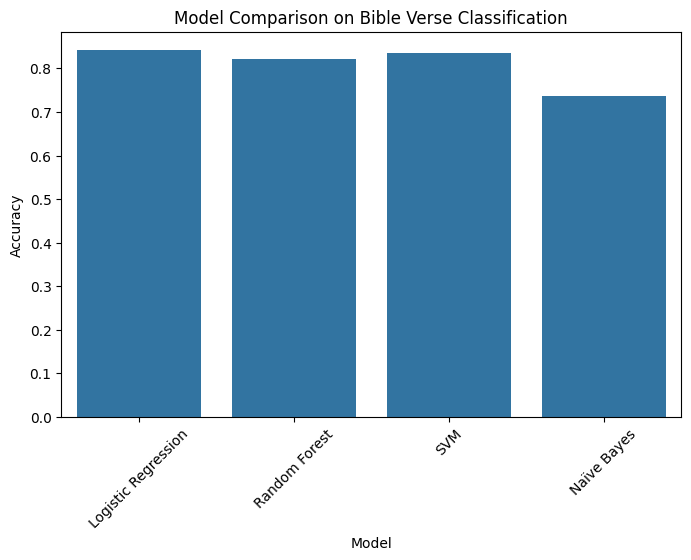

In [28]:
# Comparison
plt.figure(figsize=(8, 5))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Comparison on Bible Verse Classification")
plt.xticks(rotation=45)
plt.show()


### Evaluation and conclusion:

**Accuracy** (Resuls before re-training)

- Logistic Regression:  0.84, not bad results, that is why this was my first choice in the previous version.
- Random Forest: 0.81, RF normally works great on text classification, and in this case, it made it to the top three performers.
- SVM: 0.85, by a small difference, this is the best model performer I found until this moment. Let's try to tune it later to see if tuned performs even better.
- Naïve Bayes: 0.74, I will not say poor performance, but it's the worst among the others. Naïve Bayes normally works better in smaller datasets.



## 4. Model Development 2

Let's take advantage of the time given to finish this third CA. Now, given that the previous models did not reach an accuracy above 0.90, I will try to train this *df_train* with two more sophisticated models.

In this case, I will go for:

- WordVec + Logistic Regression
- LSTM model

### Model Selection

- WordVec + Logistic Regression

One common approach to using Word2Vec for text classification is to train the Word2Vec model on a large text dataset. This can be done using a tool like Gensim or TensorFlow. Then, once the embeddings have been introduced, they can be used as features in a machine learning model for text classification.

For example, one approach might be to represent each document as a vector by taking the average of the Word2Vec embeddings of the words in the document. Then, a classifier like logistic regression, random forests, or support vector machines can take this vector as an input.

Word2Vec embeddings turn words into vectors
Alternatively, you can also fine-tune the Word2Vec embeddings on your specific task by training a neural network to classify the text. In this approach, the Word2Vec embeddings are used as the input to the neural network, which is then trained to predict the class labels.

Word2Vec can be a powerful tool for text classification, primarily when combined with other machine learning techniques. However, it is vital to remember that there may be better approaches than this, and different algorithms like BERT or transformers may outperform them in some cases.

- LSTM Model

Text data is naturally sequential. A piece of text is a sequence of words, which might have dependencies between them. To learn and use long-term dependencies to classify sequence data, use an LSTM neural network. An LSTM network is a type of recurrent neural network (RNN) that can learn long-term dependencies between time steps of sequence data.

To input text to an LSTM network, first convert the text data into numeric sequences. You can achieve this using a word encoding which maps documents to sequences of numeric indices. For better results, also include a word embedding layer in the network. Word embeddings map words in a vocabulary to numeric vectors rather than scalar indices. These embeddings capture semantic details of the words, so that words with similar meanings have similar vectors. They also model relationships between words through vector arithmetic. For example, the relationship "Rome is to Italy as Paris is to France" is described by the equation Italy - Rome + Paris = France.

Follow the code comments to understand what ist being done.


In [29]:
# Splits
X_train, X_test, y_train, y_test = train_test_split(df_train['Pro'], df_train['Topic'], test_size=0.2, random_state=42)

# --------------------------------------------- Word2Vec + Logistic Regression ---------------------------------------------------------

# Tokenizing Text
sentences = [verse.split() for verse in X_train]

# w2v_model Best practices paramethers
w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# Function for converting text into a vectors, in average
def get_w2v_vector(text):
    words = text.split()
    vector = np.mean([w2v_model.wv[word] for word in words if word in w2v_model.wv] or [np.zeros(100)], axis=0)
    return vector

# Passing the function to X train and X test
X_train_w2v = np.array([get_w2v_vector(text) for text in X_train])
X_test_w2v = np.array([get_w2v_vector(text) for text in X_test])

# Logistic Regression model
log_reg = LogisticRegression()

# Tuning
params = {'C': [0.1, 1, 10], 'solver': ['lbfgs', 'liblinear']}

# Grid tuning with cross validation
gs = GridSearchCV(log_reg, params, cv=3)

# Fitting 
gs.fit(X_train_w2v, y_train)
y_pred_w2v = gs.predict(X_test_w2v)

# Results
results['Word2Vec + LogReg'] = accuracy_score(y_test, y_pred_w2v)
print("Word2Vec + Logistic Regression Report:\n", classification_report(y_test, y_pred_w2v))

# ---------------------------------------------  LSTM Model ---------------------------------------------------------------------
 
# Best practices paramethers
max_words = 5000
max_len = 50

# Tokenizig data
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

# Getting X train and X test tokenized
X_train_seq = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=max_len)
X_test_seq = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=max_len)

# Sequential Deep Learning Model paramethers
model = Sequential([
    Embedding(input_dim=max_words, output_dim=100, input_length=max_len),
    LSTM(64, return_sequences=True),
    LSTM(64),
    Dense(64, activation='relu'),
    Dense(len(df_train['Topic'].unique()), activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Encoding Y into integers to work with the LSTM
y_train_encoded = y_train.astype('category').cat.codes
y_test_encoded = y_test.astype('category').cat.codes

# Fitting
model.fit(X_train_seq, y_train_encoded, epochs=10, batch_size=16, validation_data=(X_test_seq, y_test_encoded))
y_pred_lstm = model.predict(X_test_seq).argmax(axis=1)

# Results
results['LSTM'] = accuracy_score(y_test_encoded, y_pred_lstm)
print("LSTM Classification Report:\n", classification_report(y_test_encoded, y_pred_lstm))


c:\Users\gabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\gabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\gabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Word2Vec + Logistic Regression Report:
                precision    recall  f1-score   support

        Death       0.24      0.68      0.35        25
         Love       0.00      0.00      0.00        27
Relationships       0.16      0.65      0.26        17
      Sabbath       0.08      0.10      0.09        10
    Salvation       0.00      0.00      0.00        28
     Strength       0.00      0.00      0.00        23
        Trust       0.00      0.00      0.00        22

     accuracy                           0.19       152
    macro avg       0.07      0.20      0.10       152
 weighted avg       0.06      0.19      0.09       152

Epoch 1/10
38/38 [==============================] - 5s 48ms/step - loss: 1.9266 - accuracy: 0.1980 - val_loss: 1.8687 - val_accuracy: 0.1974
Epoch 2/10
38/38 [==============================] - 1s 28ms/step - loss: 1.5218 - accuracy: 0.4868 - val_loss: 1.2069 - val_accuracy: 0.6316
Epoch 3/10
38/38 [==============================] - 1s 28ms/step - los

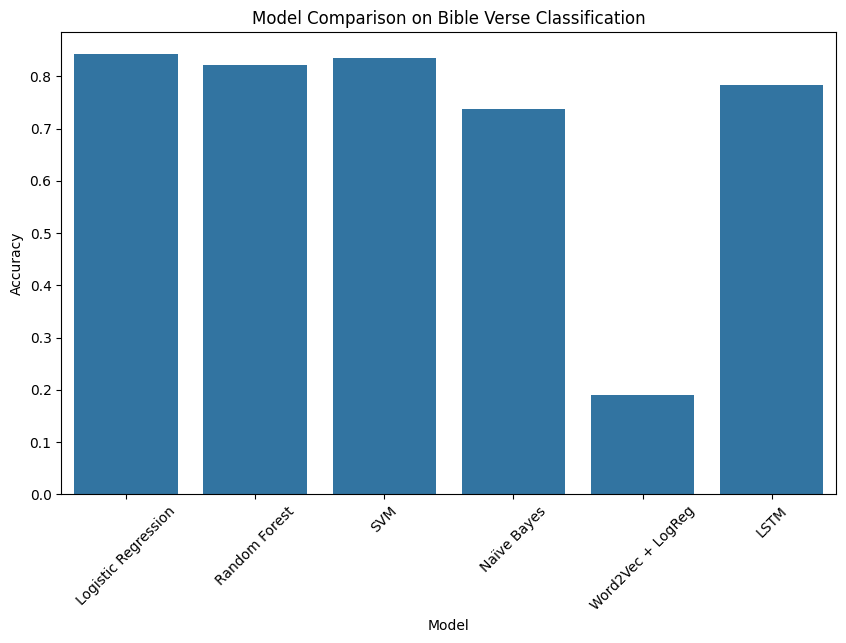

In [30]:
# Results plot
plt.figure(figsize=(10, 6))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Comparison on Bible Verse Classification")
plt.xticks(rotation=45)
plt.show()

### Evaluation and conclusion:

**Accuracy**

- Word2Vec + Logistic Regression: 0.19
- LSTM Model: 0.80

Yet I have not found any sophisticated model that performed better than a simpler one. with that being said, the **SVM model** will make it to the last round.


## 5. Best Performer Model Vs Tuned 

As mentioned above, I will move forward with the SVM model. Now, what I am going to do is tune it to find if a tuned one fits better than a regular one.

### Tuned SVM

In [41]:
# Tuned TF-IDF
tfidf_tuned = TfidfVectorizer(
    # Limiting feature space
    max_features=5000,
    # Unigrams + bigrams
    ngram_range=(1,2),
    # Lets double remove stopwords
    stop_words='english',
    # Skips rare words
    min_df=3, 
    # Skips very common words
    max_df=0.8
)
X = tfidf_tuned.fit_transform(df_train['Pro'])
y = df_train['Topic']

# Splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tuned SVM
param_grid = {
    'C': [0.1, 1, 10], 
    'kernel': ['linear', 'rbf'],
}

# Grid tuning with cross validation
grid_svm = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')

# Fitting
grid_svm.fit(X_train, y_train)
tuned_svm = grid_svm.best_estimator_

# Train Best SVM Model
tuned_svm.fit(X_train, y_train)

# Predictions
y_pred = tuned_svm.predict(X_test)

# Evaluation
print("Tuned SVM Report:\n", classification_report(y_test, y_pred))

# Storing Accuracy Results
acc_tuned = accuracy_score(y_test, y_pred)



Tuned SVM Report:
                precision    recall  f1-score   support

        Death       0.93      1.00      0.96        25
         Love       0.79      0.70      0.75        27
Relationships       0.85      1.00      0.92        17
      Sabbath       1.00      1.00      1.00        10
    Salvation       0.74      0.71      0.73        28
     Strength       0.84      0.91      0.88        23
        Trust       0.89      0.77      0.83        22

     accuracy                           0.85       152
    macro avg       0.86      0.87      0.87       152
 weighted avg       0.85      0.85      0.85       152



### SVM

In [42]:
# TF-IDF
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df_train['Pro'])
y = df_train['Topic']

# Splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Results
y_pred = svm_model.predict(X_test)
print("SVM Report:\n", classification_report(y_test, y_pred))

# Storing Accuracy Results
acc_reg = accuracy_score(y_test, y_pred)


SVM Report:
                precision    recall  f1-score   support

        Death       0.93      1.00      0.96        25
         Love       0.73      0.70      0.72        27
Relationships       0.85      1.00      0.92        17
      Sabbath       1.00      1.00      1.00        10
    Salvation       0.76      0.68      0.72        28
     Strength       0.84      0.91      0.88        23
        Trust       0.84      0.73      0.78        22

     accuracy                           0.84       152
    macro avg       0.85      0.86      0.85       152
 weighted avg       0.83      0.84      0.83       152



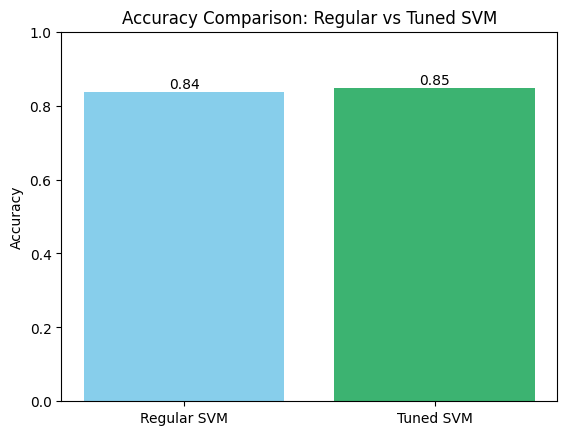

In [43]:
# Comparison plot
plt.bar(['Regular SVM', 'Tuned SVM'], [acc_reg, acc_tuned], color=['skyblue', 'mediumseagreen'])
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison: Regular vs Tuned SVM')
plt.ylim(0, 1)
plt.text(0, acc_reg + 0.01, f"{acc_reg:.2f}", ha='center')
plt.text(1, acc_tuned + 0.01, f"{acc_tuned:.2f}", ha='center')
plt.show()


Out of our three fine-tuned modes (LSTM, Word2Vec + Logistic Regression, and Tuned SVM), the latter performed better than the previous ones. When tuning the SVM, I found out that the closer I tuned to the original one, the better results I had. 

The parameters selection fitted perfectly for this case.

5-fold cross validation made the difference between the Regular SVM and the Tuned SVM.

In this case, **Tuned SVM  still performs better than Regular SVM.**

## APP MVP

Function to predict, fetch and study a random verse

In [44]:
# My main function:

# - bible_data: Original data that i need to pass to find a verse from
# - tfidf_tuned: Vector from Trained data and SVM tuned version
# - model: in this case the tuned_svm

def fetch_verse_based_on_category(bible_data, tfidf_tuned, model):

    # Topic from the df_train
    topics = df_train['Topic'].unique()
    print("Please choose a topic:")
    for i, topic in enumerate(topics, 1):
        print(f"{i}. {topic}")

    # User input
    try:
        choice = int(input("Enter the number of your topic: "))
        if choice < 1 or choice > len(topics):
            raise ValueError("Invalid choice!")
    except ValueError:
        print("Invalid input. Please enter a number corresponding to a topic.")
        return
    
    # Show the topic selected
    selected_topic = topics[choice - 1]
    print(f"You selected: {selected_topic}")

    # When a topic is selected, a while loop starts to fetch verses
    while True:
        # Random verse from bible_data['king_james_bible_kjv'] column
        random_row = bible_data.sample(n=1).iloc[0]
        random_verse = random_row['king_james_bible_kjv']
        book_name = random_row['book_name']
        chapter = random_row['chapter']
        verse = random_row['verse']

        # Preprocess and predict its category
        processed_verse = process_text(random_verse) 
        tfidf_vector = tfidf_tuned.transform([processed_verse]) 
        predicted_category = model.predict(tfidf_vector)[0]

        # Print the verse if it matches the selected topic
        if predicted_category == selected_topic:
            print(f"Here's a verse about {selected_topic}:")
            print(f"{random_verse}\n({book_name} {chapter}:{verse})")
            break

# Calling the function with the desired data
fetch_verse_based_on_category(bible_data, tfidf_tuned, tuned_svm)


Please choose a topic:
1. Love
2. Sabbath
3. Trust
4. Salvation
5. Relationships
6. Strength
7. Death
You selected: Sabbath
Here's a verse about Sabbath:
But the seventh day is the sabbath of the LORD thy God: in it thou shalt not do any work, thou, nor thy son, nor thy daughter, thy manservant, nor thy maidservant, nor thy cattle, nor thy stranger that is within thy gates:
(Exodus 20:10)


## Results

**Challenges**

- It works great when at least the root word of the given topic is found in the text but when I need a verse that does not have the root word in the verse, results allucinates a bit.
- One cool feature we can add to this dataset: it would be better off if instead of the whoile bible I load the most common bible verses from the Scriptures (In this case I would neeed to change the whole bible_data dataset), skipping out of context verses. (e.g: When trying to predict a verse about the Sabbath topic, not because the word "day" is in the verse do not necessarly means that is a text about the sabbath).

- Now with the growth of AI, specially in LLM, this app could have been done with a few lines of code, a simply API call to OpenAI databases, (Which is not an open source product, but in terms of adoption it is the most accepted one, if an open source needed I could use Deepseek) Leveraging ChatGPT (One of the most if not the most reliables data to text model) accuracy in text prediction.

**Results and analysis… next steps**

- Overall the building of this predicting bible verses project have been succesful, from data overview to model evaluation. Having an accuracy of 0.85 helps a lot in terms of text prediction, I have to say that it surprises me how it is able to find bible verses related to the given topic. still there is room for improvement.

- In the future I could take advantage of my EDA to create a better solution for specific topics. Lets say an user needs some words of wisdom, I would fit a model that reads more data from the Proverbs book than any other bible book.

- Without letting down the Data Analytics side of this study, something that I learnt along the proccess is that the simpler the better. My simplest models gave me the best results.

**Conclusion**

- Without a doubt I would proceed with the creation of this app, a church that leverages the use of IT will get a huge competitive advantage. First of all a church that uses AI will be more atractive to a younger generation that was borned with the understanding and the importance of it. This app will boost people understanding of the Word of God, attracting more people to look to spend time and congreate in this cool local church, helping this church to grow in numbers and finally pontentially increasing the amount of donations.


## References

Qudirah (2023). Sentiment Analysis Project Using TextBlob. [online] Medium. Available at: https://medium.com/@qudrohbidemi/sentiment-analysis-project-using-textblob-216d3fe119fc.

CodeSignal (2024). Mastering Random Forest for Text Classification. [online] CodeSignal Learn. Available at: https://codesignal.com/learn/courses/introduction-to-modeling-techniques-for-text-classification/lessons/mastering-random-forest-for-text-classification.

DailyVerses.net. (2025). Bible Verses by Topic. [online] Available at: https://dailyverses.net/topics [Accessed 5 May 2025].

IBM (2023). Support Vector Machine. [online] IBM. Available at: https://www.ibm.com/think/topics/support-vector-machine.

MathWorks (2025). Classify Text Data Using Deep Learning - MATLAB & Simulink. [online] Mathworks.com. Available at: https://www.mathworks.com/help/textanalytics/ug/classify-text-data-using-deep-learning.html [Accessed 5 May 2025].

Otten, N.V. (2023). Tutorial TF-IDF vs Word2Vec For Text Classification [How To In Python With And Without CNN]. [online] Spot Intelligence. Available at: https://spotintelligence.com/2023/02/15/word2vec-for-text-classification/.

Turing (2025). How to Use Naive Bayes for Text Classification in Python? [online] www.turing.com. Available at: https://www.turing.com/kb/document-classification-using-naive-bayes.

